In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Bharani\Downloads\Dissertation_Project\Dataset\loan_sanction_train.csv"
data = pd.read_csv(file_path)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
# Display the basic information of the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
# Display the first few rows of the dataset for an initial look
data_head = data.head()
data_head

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Display the unique values count for each column to understand categorical features
unique_counts = data.nunique()
unique_counts

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# Data Cleaning
# Filling missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [8]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [9]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
5,5,1,1,2,0,1,353,241,169,8,1,2,1
6,6,1,1,0,1,0,65,61,48,8,1,2,1
7,7,1,1,3,0,0,146,174,111,8,0,1,0
8,8,1,1,2,0,0,269,63,120,8,1,2,1
9,9,1,1,1,0,0,470,282,186,8,1,1,0


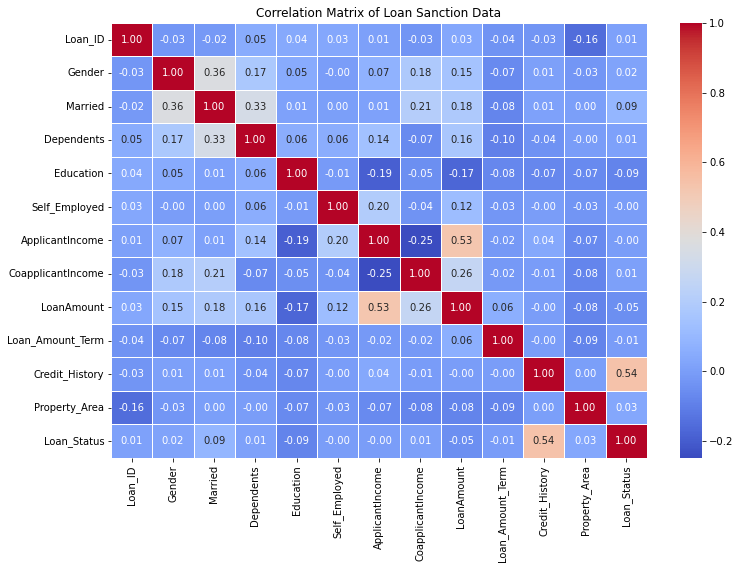

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Loan Sanction Data")
plt.show()

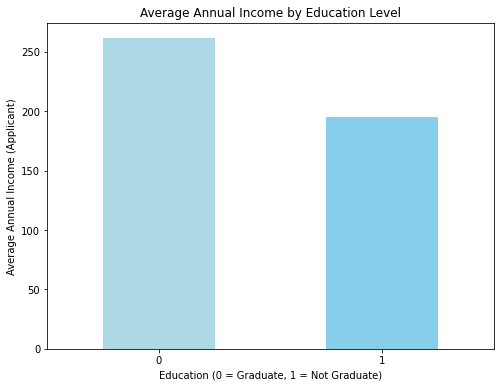

In [11]:
# Bar Plot for Education vs. Average Applicant Income with different colors for each bar
plt.figure(figsize=(8, 6))
education_income = data.groupby('Education')['ApplicantIncome'].mean()
education_income.plot(kind='bar', color=['lightblue','skyblue'])  
plt.title("Average Annual Income by Education Level")
plt.xlabel("Education (0 = Graduate, 1 = Not Graduate)")
plt.ylabel("Average Annual Income (Applicant)")
plt.xticks(rotation=0)
plt.show()

<Figure size 720x432 with 0 Axes>

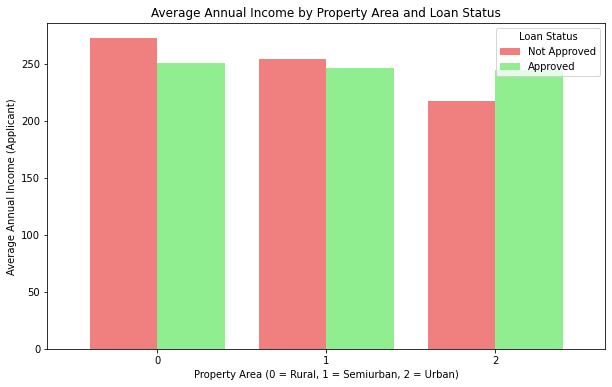

In [12]:
# Revised Plot 2: Grouped Bar Plot for Property Area vs. Average Applicant Income with Loan Status differentiation
plt.figure(figsize=(10, 6))
property_income = data.groupby(['Property_Area', 'Loan_Status'])['ApplicantIncome'].mean().unstack()
property_income.plot(kind='bar', color=['lightcoral', 'lightgreen'], figsize=(10, 6), width=0.8)
plt.title("Average Annual Income by Property Area and Loan Status")
plt.xlabel("Property Area (0 = Rural, 1 = Semiurban, 2 = Urban)")
plt.ylabel("Average Annual Income (Applicant)")
plt.xticks(rotation=0)
plt.legend(["Not Approved", "Approved"], title="Loan Status")
plt.show()

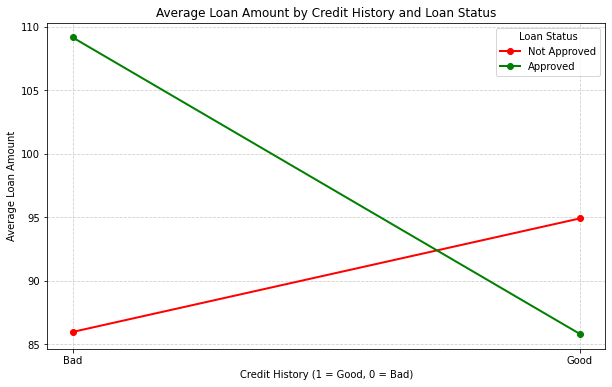

In [13]:
# Creating a line plot with separate lines for each Loan Status to enhance clarity
# Calculate the mean LoanAmount grouped by Credit History and Loan Status
credit_history_loan_amount = data.groupby(['Credit_History', 'Loan_Status'])['LoanAmount'].mean().unstack()

# Enhanced line plot
plt.figure(figsize=(10, 6))
plt.plot(credit_history_loan_amount.index, credit_history_loan_amount[0], marker='o', linestyle='-', linewidth=2, label='Not Approved', color='red')
plt.plot(credit_history_loan_amount.index, credit_history_loan_amount[1], marker='o', linestyle='-', linewidth=2, label='Approved', color='green')
plt.title("Average Loan Amount by Credit History and Loan Status")
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Average Loan Amount")
plt.xticks([0, 1], labels=["Bad", "Good"])  # Custom labels for Credit History
plt.legend(title="Loan Status")
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid lines for better readability
plt.show()

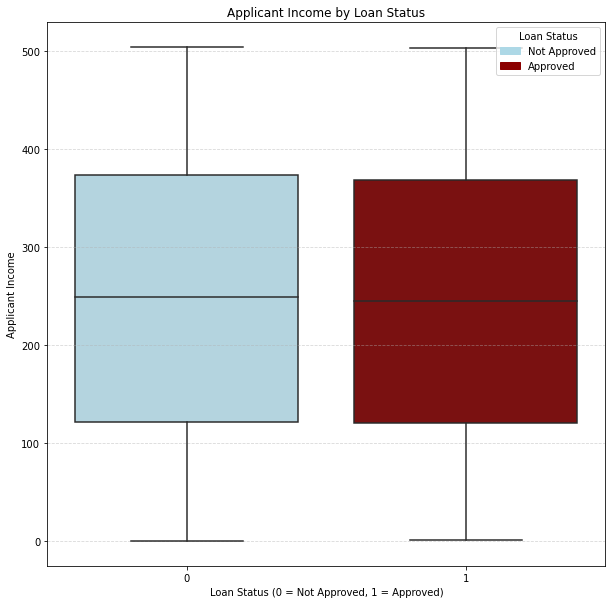

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Set custom colors for the box plot
colors = ['lightblue', 'darkred']

# Box Plot to show the distribution of Applicant Income by Loan Status
plt.figure(figsize=(10, 10))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data, palette=colors)
plt.title("Applicant Income by Loan Status")
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Applicant Income")
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding grid for readability

# Custom legend with matching colors
not_approved = mpatches.Patch(color='lightblue', label='Not Approved')
approved = mpatches.Patch(color='darkred', label='Approved')
plt.legend(handles=[not_approved, approved], title="Loan Status", loc="upper right")

plt.show()

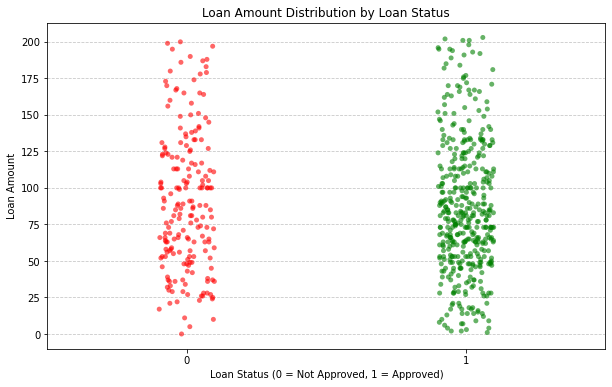

In [15]:
# Assuming 'data' is your DataFrame containing 'LoanAmount' and 'Loan_Status'

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Loan_Status', 
    y='LoanAmount', 
    data=data, 
    jitter=True,  # Adds jitter to avoid overlapping points
    palette={0: 'red', 1: 'green'},  # Custom colors for loan status
    alpha=0.6  # Set transparency for better visibility
)
plt.title("Loan Amount Distribution by Loan Status")
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Loan Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid for readability
plt.show()


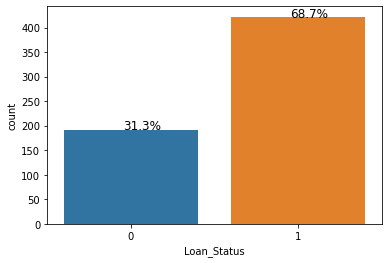

In [16]:
ax = sns.countplot(x='Loan_Status', data=data)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Random Forest Classifier

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Feature selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']  # Assuming 'Loan_Status' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# XGBoost

In [19]:
from xgboost import XGBClassifier

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Support Vector Machine(SVM)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# Learning Curve For All Models

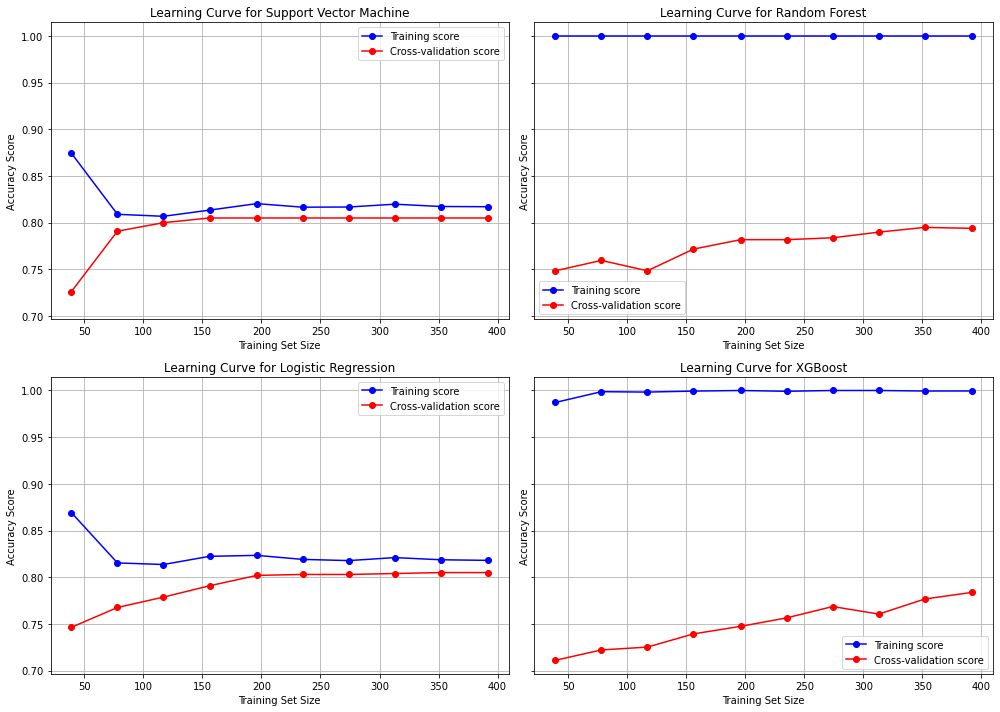

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Plot learning curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.ravel()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for idx, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[idx].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    axes[idx].plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')
    axes[idx].set_title(f'Learning Curve for {name}')
    axes[idx].set_xlabel('Training Set Size')
    axes[idx].set_ylabel('Accuracy Score')
    axes[idx].legend(loc='best')
    axes[idx].grid()

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate Training Score
    train_predictions = model.predict(X_train)
    training_score = accuracy_score(y_train, train_predictions)
    
    # Calculate Cross-Validation Score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_validation_score = cv_scores.mean()
    
    print(f'{name}:')
    print(f'  Training Score: {training_score:.2f}')
    print(f'  Cross-Validation Score: {cross_validation_score:.2f}\n')


Support Vector Machine:
  Training Score: 0.81
  Cross-Validation Score: 0.81

Random Forest:
  Training Score: 1.00
  Cross-Validation Score: 0.80

Logistic Regression:
  Training Score: 0.81
  Cross-Validation Score: 0.81



C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sm

XGBoost:
  Training Score: 1.00
  Cross-Validation Score: 0.78



C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Bharani\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sm

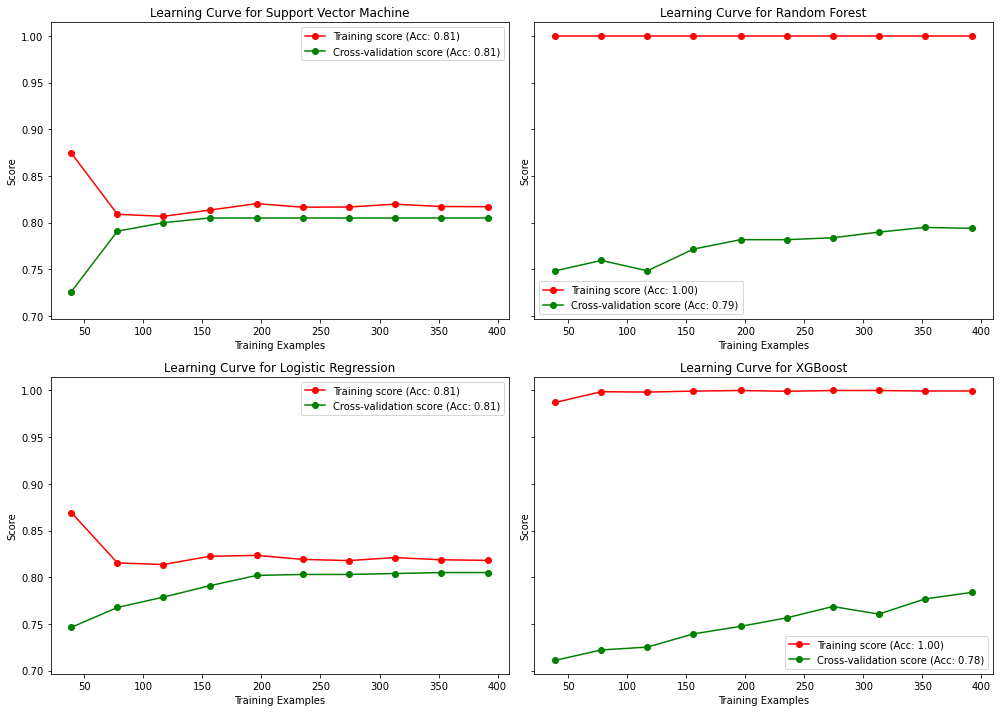

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Feature Selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Plot learning curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.ravel()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for idx, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate Training Score
    train_predictions = model.predict(X_train)
    training_score = accuracy_score(y_train, train_predictions)
    
    # Calculate Cross-Validation Score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cross_validation_score = cv_scores.mean()
    
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    axes[idx].plot(train_sizes, train_scores_mean, 'o-', color='r', label=f'Training score (Acc: {training_score:.2f})')
    axes[idx].plot(train_sizes, test_scores_mean, 'o-', color='g', label=f'Cross-validation score (Acc: {cross_validation_score:.2f})')
    axes[idx].set_title(f'Learning Curve for {name}')
    axes[idx].set_xlabel('Training Examples')
    axes[idx].set_ylabel('Score')
    axes[idx].legend(loc='best')

plt.tight_layout()
plt.show()
